In [234]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [235]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into testing and training

In [236]:
train_images.shape
type(train_images)


numpy.ndarray

In [237]:
train_images[0,23,23]  # let's have a look at one pixel
#print(train_images[0])

194

In [238]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [239]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

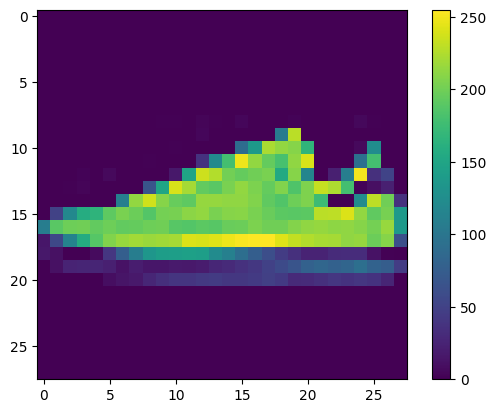

In [240]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.show()

In [241]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [242]:
from keras.regularizers import L2
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu',  # hidden layer (2)
    kernel_regularizer=L2(0.005)),
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [243]:
model.fit(train_images, train_labels, epochs=10)  

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7918 - accuracy: 0.8067
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5944 - accuracy: 0.8262
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5721 - accuracy: 0.8323
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5554 - accuracy: 0.8354
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5418 - accuracy: 0.8400
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5322 - accuracy: 0.8423
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5235 - accuracy: 0.8451
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5151 - accuracy: 0.8476
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5088 - accuracy: 0.8484
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.504

In [256]:
test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc[1])



313/313 [==============================] - 1s 4ms/step - loss: 0.5246 - accuracy: 0.8430
Test accuracy: 0.8429999947547913


In [270]:
predictions = model.predict(test_images)
#print(predictions[0])
value=int(input())
type(value)
value1=np.argmax(predictions[value])
print(class_names[value1])

313/313 [==============================] - 1s 3ms/step
Shirt


313/313 [==============================] - 1s 2ms/step
Shirt


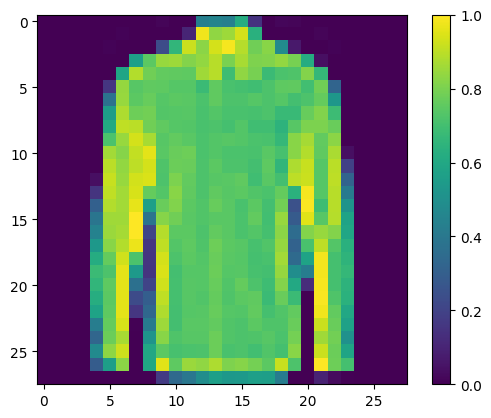

In [271]:
predictions=model.predict(test_images)
print(class_names[np.argmax(predictions[value])])
plt.figure()
plt.imshow(test_images[value])
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 16ms/step


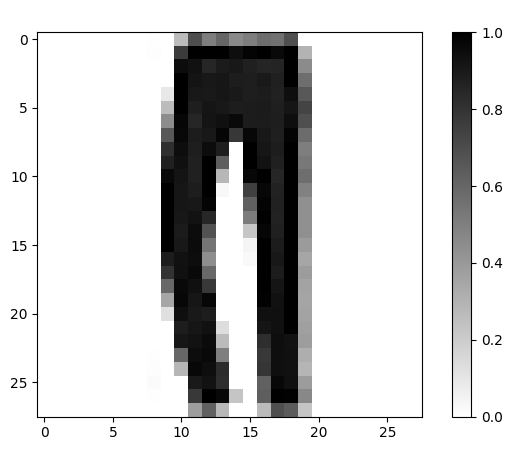

In [278]:
#Actual vs Predicted

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.tight_layout()
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 10000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
